**Meta DataSet(About Dataset)**
**Context**/  
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

**Content**
**Column Descriptions:**
**id** (Unique id for each patient)
**age** (Age of the patient in years)
**origin** (place of study)
**sex** (Male/Female)
**cp**chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
**trestbps** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
**chol** (serum cholesterol in mg/dl)
**fbs** (if fasting blood sugar > 120 mg/dl)
**restecg** (resting electrocardiographic results)
-- **Values:** [normal, stt abnormality, lv hypertrophy]
**thalach:** maximum heart rate achieved
**exang:** exercise-induced angina (True/ False)
**oldpeak:** ST depression induced by exercise relative to rest
**slope:** the slope of the peak exercise ST segment
**ca:** number of major vessels (0-3) colored by fluoroscopy
**thal:** [normal; fixed defect; reversible defect]
**num:** the predicted attribute

**Acknowledgements**

**Creators:**

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Relevant Papers:**

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link

**Citation Request:**

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

**##Aims and object**
we will fill  this after EDA

**Import Library**
Let's start the project by importing all libraries that will need this project

In [2]:
#Importing libraries

#To Handle data
import numpy as np
import pandas as pd

#To Visulize the data
import matplotlib.pyplot as plt
import seaborn as sns


#To preprocess the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer

#Import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#ML task
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

#For classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,RandomForestRegressor
from xgboost import XGBClassifier
import plotly.express as px
#Evaluation Metrix 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_absolute_error,mean_squared_error,r2_score,f1_score

#Ignore the warning
import warnings
warnings.filterwarnings("ignore")

Load the data set

In [3]:
#Load the data set by read_csv method using pandas
df=pd.read_csv("heart_disease_uci.csv")

#Print first five rows by using head method
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### **EXploratory Data Analysis (EDA)**

### EXplore each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
#data shape (Check the how many rows and columns in data set)
df.shape

(920, 16)

In [8]:
#Check the range of age column
df["age"].min(),df["age"].max()

(28, 77)

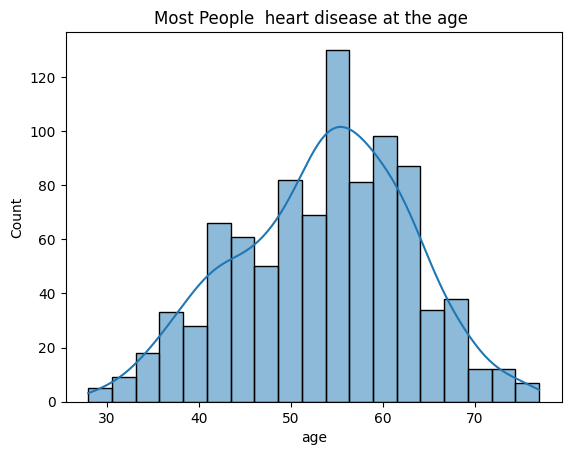

In [9]:
#Draw the histogram to see the distrbution of age column
sns.histplot(data=df,x=df["age"],kde=True)
plt.title("Most People  heart disease at the age ")
plt.show()

Mean =  53.51086956521739
Meadian =  54.0
Mode =  54


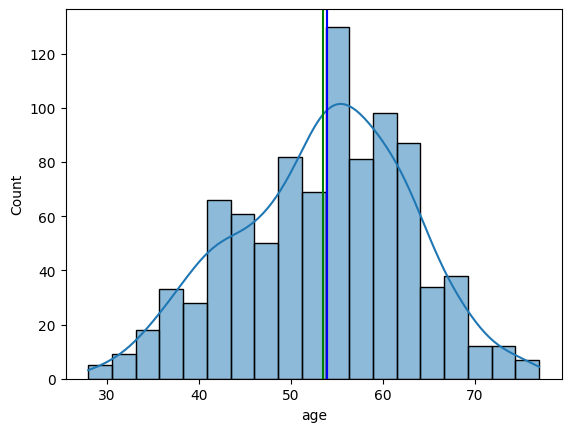

In [10]:
#Plot the mean, meadian,and mode of age coloumn
sns.histplot(df["age"],kde=True)
plt.axvline(df["age"].mean(),color="green")
plt.axvline(df["age"].median(),color="red")
plt.axvline(df["age"].mode()[0],color="blue")

#Print the value of mean,median and mode of age column
print("Mean = ",df["age"].mean())
print("Meadian = ",df["age"].median())
print("Mode = ",df["age"].mode()[0])
plt.show()

In [11]:
#Plot the histogram of age column using plotly and coluoring by sex
fig=px.histogram(data_frame=df,x="age",color="sex")
fig.show()

In [12]:
#Find the sex column count
df["sex"].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [13]:
#Find the percentage of the male and female in the data
male=726
female=194
total=male + female

male_per=male/total*100
female_per=female/total*100

print(f"Male Heart Disease = {male_per:0.2f}")
print(f"Female Heart Disease = {female_per:0.2f}")

Male Heart Disease = 78.91
Female Heart Disease = 21.09


In [14]:
#Find the value count of the age column by grouping sex column
df.groupby("sex")["age"].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [6]:
#Find the unique value
df["dataset"].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [16]:
#Count the unique value
df["dataset"].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


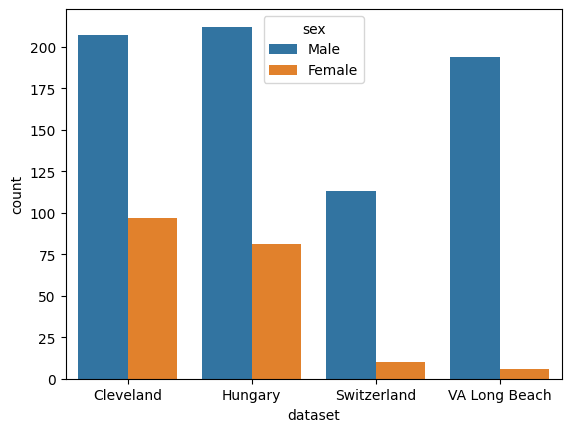

In [17]:
#Count the dataset by count plot
sns.countplot(data=df,x="dataset",hue="sex")
print(df.groupby("sex")["dataset"].value_counts())
plt.show()

In [18]:
#Plot a age column using plotly and coluring datasets
fig=px.histogram(data_frame=df,x="age",color="dataset")
fig.show()
#Print the mean median and mode of age by  grouping dataset
print("Mean of the  data ",df.groupby("dataset")["age"].mean(),"\n")
print("*******"*4)
print("Median of the  data ",df.groupby("dataset")["age"].median(),"\n")
print("*******"*4)
print("Mode of the  data ",df.groupby("dataset")["age"].agg(pd.Series.mode),"\n")
print("*******"*4)


Mean of the  data  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64 

****************************
Median of the  data  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64 

****************************
Mode of the  data  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object 

****************************


In [19]:
#Let's explore the cp(chest pain) column

In [20]:
#value count of cp column
df["cp"].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [21]:
#Draw the plot of age column based  on cp column
fig=px.histogram(data_frame=df,x="age",color="cp")
fig.show()

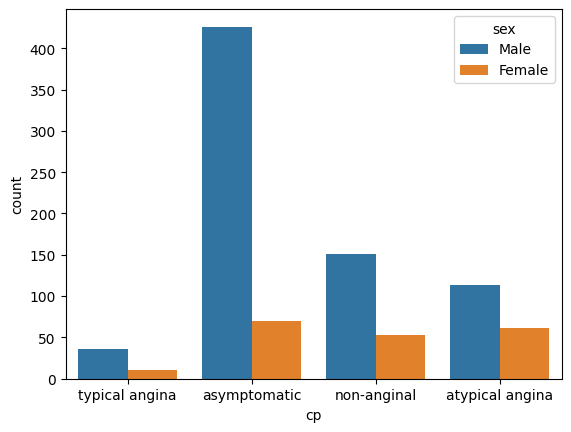

In [22]:
#Count plot by sex column
sns.countplot(df,x="cp",hue="sex")
plt.show()

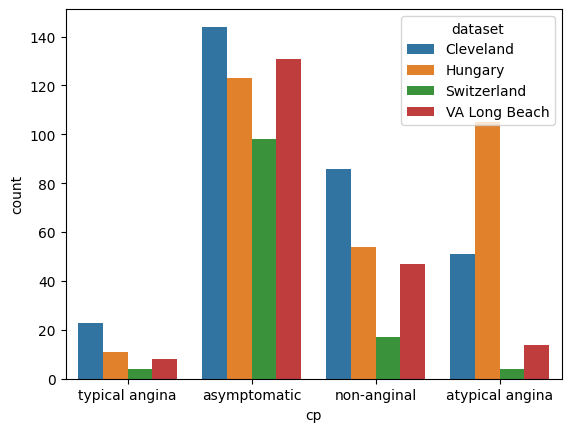

In [23]:
#Count plot by dataset column
sns.countplot(df,x="cp",hue="dataset")
plt.show()

Let's explore the trestbps(resting blood pressure)
The normal range of blood pressure is 120/80

In [24]:
#Find the missing values
df["trestbps"].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

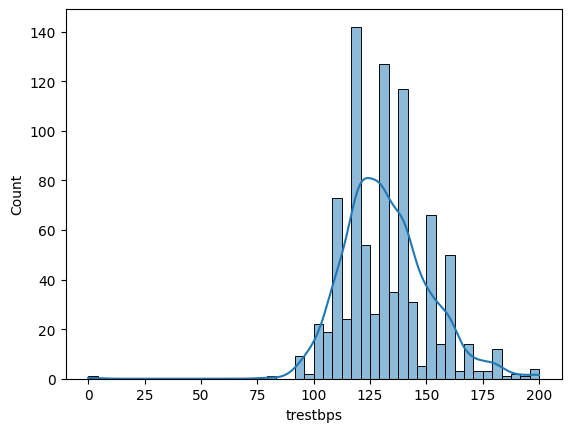

In [25]:
#Create a hist plot
sns.histplot(data=df,x="trestbps",kde=True)
plt.show()

In [26]:
#Check the missing values
print("Percentage of missing value is \n")
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Percentage of missing value is 



ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [27]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [28]:

#Store the missing values
missing_data_column=df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_column

categorical_col=['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','num']
bool_cols=["fbs","exang"]
numeraical_col=['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',]
#df.select_dtypes(include="object").columns.tolist()

df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("MSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")#Percentage of missing values
    if col in categorical_col:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeraical_col:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass


Missing Values trestbps : 6.41%
MAE = 13.419364161849712 

MSE = 17.35062000191541 

R2 = 0.060043416811573214 

Missing Values chol : 3.26%
MAE = 44.551460674157305 

MSE = 63.70411141548051 

R2 = 0.6785202883916523 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
MAE = 16.71208092485549 

MSE = 21.547084201168712 

R2 = 0.3249027620685424 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5668488372093022 

MSE = 0.8009532039287445 

R2 = 0.3888156407806479 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values ca : 66.41%
MAE = 0.6604838709677419 

MSE = 0.917608216348174 

R2 = 0.10515161736245515 

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 68.97 accuracy



In [29]:
# Second method
# #Dealling with missing values
# imputer=KNNImputer(n_neighbors=5)
# for i in df.select_dtypes(include="object").columns:
#     df[i]=df[i].fillna(df[i].mode()[0])
    
# for j in df.select_dtypes(include="number").columns:
#     df[j]=imputer.fit_transform(df[[j]])

In [30]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Dealing with outliers

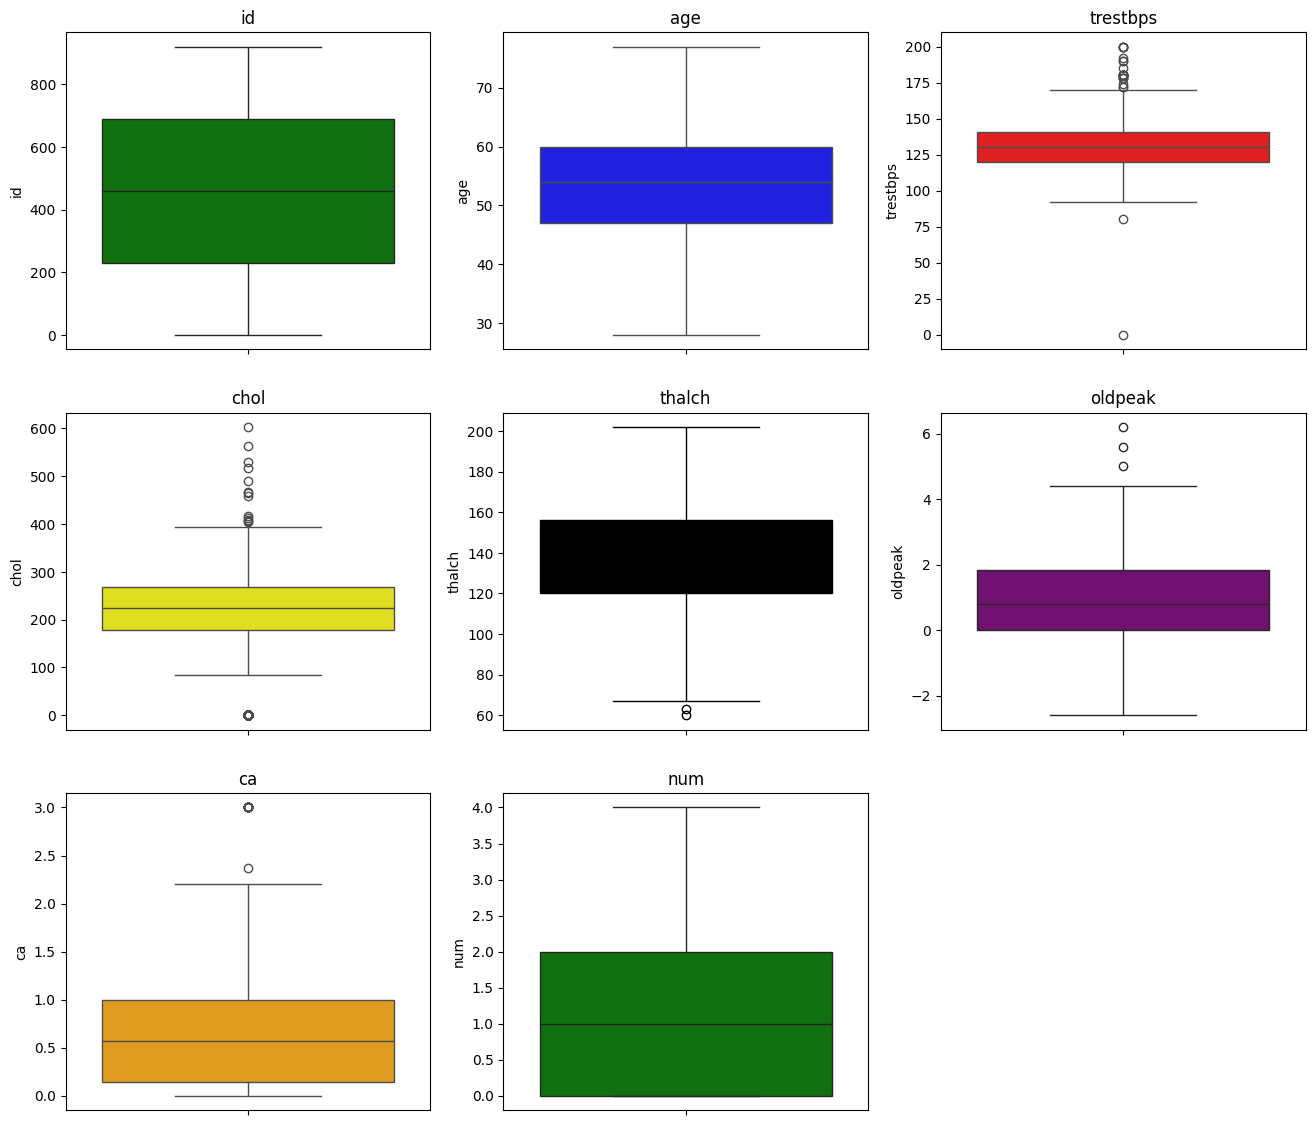

In [ ]:
#Draw all in a one shape
plt.figure(figsize=(16,14))
col=['green', 'blue', 'red', 'yellow', 'black', 'purple', 'orange', 'green']
for i,j in enumerate(df.select_dtypes(include="number")):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[j],color=col[i])
    plt.title(j)
plt.show()

In [32]:
#Make a same plot with plotly
for i in df.select_dtypes(include="number").columns:
    fig=px.box(df[i],)
    fig.show()

In [33]:
# from scipy.stats import zscore

# # Calculate the z-score for each feature
# z_scores = np.abs(zscore(df.select_dtypes(include=["number"])))

# # Define a threshold
# threshold = 3

# # Filter out the outliers
# df = df[(z_scores < threshold).all(axis=1)]

# print("Original data shape:", df.shape)
# print("Data shape after removing outliers using Z-Score:", df.shape)


In [34]:
d=["age","ca","oldpeak","chol","thalch","trestbps"]

In [35]:
# #Remove the all outlier
def outlier(col):
    q1,q3=np.percentile(col,[25,75])
    innerquartilerange=q3-q1
    loweroutlier=q1-1.5*innerquartilerange
    upperoutlier=q3+1.5*innerquartilerange
    return loweroutlier,upperoutlier
    
for i in df[d]:
    loweroutlier,upperoutier=outlier(df[i])
    df[i]=np.where(df[i]<loweroutlier,loweroutlier,df[i]) #If less than lower outlier then fill it loweroutlier or as it
    df[i]=np.where(df[i]>upperoutier,upperoutier,df[i])


In [36]:
#Check the outlier are removed with  plotly
for i in d:
    fig=px.box(df[i])
    fig.show()

**Applying Machine Learning Model**

In [37]:

df["num"].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

# The num is the predicted attribute which predict the heart disease. There are five stages of heart disease.  
# Where [0,1,2,3,4] are the types or stages of heart disease   
0 --> No Heart Disease  
1 --> Mild Heart Disease  
2 --> Moderate Heart Disease  
3 --> Severe Heart Disease  
4 --> Critical Heart Disease  
 

Enlist the all model that will use for classifier for multi-class classification

In [41]:
#Split the data
X=df.drop("num",axis=1)
Y=df["num"]

#Encode the X data using seperate Label Encoder for all categorical  columns and then apply inverse transform
label_sex=LabelEncoder()
label_dataset=LabelEncoder()
label_cp=LabelEncoder()
label_fbs=LabelEncoder()
label_restecg=LabelEncoder()
label_exang=LabelEncoder()
label_slope=LabelEncoder()
label_thal=LabelEncoder()

df["sex"]=label_sex.fit_transform(df["sex"])
df["dataset"]=label_dataset.fit_transform(df["dataset"])
df["cp"]=label_cp.fit_transform(df["cp"])
df["fbs"]=label_fbs.fit_transform(df["fbs"])
df["restecg"]=label_restecg.fit_transform(df["restecg"])
df["exang"]=label_exang.fit_transform(df["exang"])
df["slope"]=label_slope.fit_transform(df["slope"])
df["thal"]=label_thal.fit_transform(df["thal"])

# #Scaling the dataset 
col=["age","trestbps","thalch","chol"]
for i in col:
    X[i]=MinMaxScaler().fit_transform(X[[i]])
#train test the split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

#Import the metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Create  list  of the model

model=[
    
    ("LogisticRegression ",LogisticRegression(random_state=42)),
    ("SVC",SVC()),
    ("KNeighborsClassifier",KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree classifier",DecisionTreeClassifier(random_state=42)),
    ("RandomForestClassifier",RandomForestClassifier(random_state=42)),
    ("XGBClassifier",XGBClassifier()),
    ("LGBMClassifier",LGBMClassifier(random_state=42,verbose=-1)),
    ("AdaBoostClassifier",AdaBoostClassifier(random_state=42)),
    ("Gradient boost classifier",GradientBoostingClassifier(random_state=42)),
    ("GaussianNB",GaussianNB())
    
]

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
best_accuracy=0.0
best_model=None
for name,models in model:
    
    #Train the model
    models.fit(X_train,Y_train)
    
    #Predict the model
    Y_pred=models.predict(X_test)
    
    #evaluate 
    test_accuracy=accuracy_score(Y_test,Y_pred)
    
    class_report=classification_report(Y_test,Y_pred)
    
    conf_matrix=confusion_matrix(Y_test,Y_pred)
    
    print("*******************************************")
    print("model ",name)
    print("test accuracy = ",test_accuracy)
    print("classfication report \n",class_report)
    #print("confusion matrix \n",conf_matrix)
    print("*************************************************")
        

# Update the best model if the current one has higher accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = (name, model)

# Output the best model
print("Best model:", best_model[0], "with accuracy =", best_accuracy)

*******************************************
model  LogisticRegression 
test accuracy =  0.5706521739130435
classfication report 
               precision    recall  f1-score   support

           0       0.69      0.92      0.79        75
           1       0.51      0.48      0.50        54
           2       0.27      0.16      0.20        25
           3       0.35      0.23      0.28        26
           4       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.36      0.36      0.35       184
weighted avg       0.52      0.57      0.53       184

*************************************************
*******************************************
model  SVC
test accuracy =  0.5706521739130435
classfication report 
               precision    recall  f1-score   support

           0       0.65      0.89      0.75        75
           1       0.47      0.70      0.56        54
           2       0.00      0.00      0.00        25


  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


*******************************************
model  LGBMClassifier
test accuracy =  0.7065217391304348
classfication report 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        75
           1       0.69      0.67      0.68        54
           2       0.56      0.36      0.44        25
           3       0.54      0.58      0.56        26
           4       0.00      0.00      0.00         4

    accuracy                           0.71       184
   macro avg       0.52      0.51      0.51       184
weighted avg       0.68      0.71      0.69       184

*************************************************
*******************************************
model  AdaBoostClassifier
test accuracy =  0.592391304347826
classfication report 
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        75
           1       0.60      0.52      0.55        54
           2       0.30      0.24      0.27  

accuracy_score 0.592391304347826
Classification Report                precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.54      0.50      0.52        54
           2       0.18      0.08      0.11        25
           3       0.42      0.50      0.46        26
           4       0.29      0.50      0.36         4

    accuracy                           0.59       184
   macro avg       0.44      0.49      0.45       184
weighted avg       0.56      0.59      0.57       184

confusion_matrix 


<Axes: >

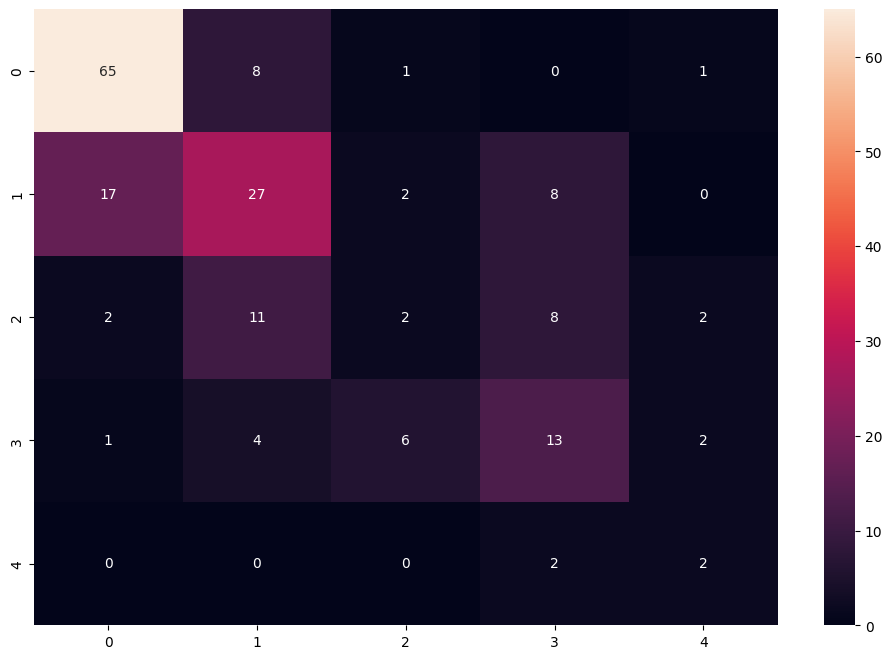

In [46]:
print("accuracy_score",accuracy_score(Y_test,Y_pred))
print("Classification Report ",classification_report(Y_test,Y_pred))
print("confusion_matrix ")
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")